In [1]:
import glob
import numpy as np
import datetime as dt
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
company_name = {
    "CFG": "",
    "FHN": "",
    "SF": "",
    "IBKR": "",
    "ALLY": "",
    "WFC": "",
    "C": "Citigroup",
    "BAC": "",
    "FRC": "",
    "JPM": "",
    "DCOM": "",
    "PEBO": "",
    "SBNY": "",
    "FNB": "",
    "OCFC": "",
    "MSFT": "",
    "NVDA": "",
    "FB": "",
    "GOOGL": "Google",
    "AAPL": "",
    "NVS": "",
    "AZN": "",
    "MRNA": "",
    "PFE": "",
    "JNJ": ""
}

In [3]:
df = pd.DataFrame()

for path in glob.glob("Data/*/Large-Cap/*.csv"):
    print(path)
    sector = path.split("/")[1]
    cap = path.split("/")[2]
    company = path.split("/")[3].split(".")[0]
    
    newdf = pd.read_csv(path, usecols=["Close","Date"], index_col =["Date"], infer_datetime_format= True, parse_dates= True)
    
    lendf = len(newdf)
    newdf["Sector"] = [sector] * lendf
    newdf["Cap"] = [cap] * lendf
    newdf["Company"] = [company] * lendf
    df = pd.concat([df, newdf], axis=0)

print(df.shape)
df.head()

Data/Technology/Large-Cap/MSFT.csv
Data/Technology/Large-Cap/NVDA.csv
Data/Technology/Large-Cap/FB.csv
Data/Technology/Large-Cap/GOOGL.csv
Data/Technology/Large-Cap/AAPL.csv
Data/Healthcare/Large-Cap/NVS.csv
Data/Healthcare/Large-Cap/AZN.csv
Data/Healthcare/Large-Cap/MRNA.csv
Data/Healthcare/Large-Cap/PFE.csv
Data/Healthcare/Large-Cap/JNJ.csv
Data/Banking/Large-Cap/C.csv
Data/Banking/Large-Cap/BAC.csv
Data/Banking/Large-Cap/FRC.csv
Data/Banking/Large-Cap/WFC.csv
Data/Banking/Large-Cap/JPM.csv
(6285, 4)


,Close,Sector,Cap,Company
Date,,,,
2019-12-02,149.550003,Technology,Large-Cap,MSFT
2019-12-03,149.309998,Technology,Large-Cap,MSFT
2019-12-04,149.850006,Technology,Large-Cap,MSFT
2019-12-05,149.929993,Technology,Large-Cap,MSFT
2019-12-06,151.750000,Technology,Large-Cap,MSFT


In [4]:
benchmark_tech = pd.read_csv("Data/Benchmark/NASDAQ 100- Tech Sector Index.csv", usecols=[" Close","Date"], index_col =["Date"], infer_datetime_format= True, parse_dates= True)
benchmark_tech.rename(columns={' Close': 'Technology_Benchmark'}, inplace=True)
benchmark_tech = benchmark_tech.pct_change().dropna()
benchmark_tech = (1+benchmark_tech).cumprod()
print(benchmark_tech.columns)
print(benchmark_tech.shape)
benchmark_tech.head()

Index(['Technology_Benchmark'], dtype='object')
(418, 1)


,Technology_Benchmark
Date,
2021-07-29,1.005913
2021-07-28,1.003890
2021-07-27,0.999804
2021-07-26,1.011100
2021-07-23,1.010153


In [5]:
benchmark_bnf = pd.read_csv("Data/Benchmark/DJUSBK- Dow Jones U.S. Banks Index.csv", usecols=[" Close","Date"], index_col =["Date"], infer_datetime_format= True, parse_dates= True)
benchmark_bnf.rename(columns={' Close': 'Banking_Benchmark'}, inplace=True)
benchmark_bnf = benchmark_bnf.pct_change().dropna()
benchmark_bnf = (1+benchmark_bnf).cumprod()
print(benchmark_bnf.columns)
print(benchmark_bnf.shape)
benchmark_bnf.head()

Index(['Banking_Benchmark'], dtype='object')
(431, 1)


,Banking_Benchmark
Date,
2021-07-29,1.012030
2021-07-28,1.001580
2021-07-27,0.997490
2021-07-26,0.998903
2021-07-23,0.990406


In [6]:
benchmark_hc = pd.read_csv("Data/Benchmark/S&P 500 healthcare sector index.csv", usecols=[" Close","Date"], index_col =["Date"], infer_datetime_format= True, parse_dates= True)
benchmark_hc.rename(columns={' Close': 'Healthcare_Benchmark'}, inplace=True)
benchmark_hc = benchmark_hc.pct_change().dropna()
benchmark_hc = (1+benchmark_hc).cumprod()
print(benchmark_hc.columns)
print(benchmark_hc.shape)
benchmark_hc.head()

Index(['Healthcare_Benchmark'], dtype='object')
(418, 1)


,Healthcare_Benchmark
Date,
2021-07-29,0.999246
2021-07-28,0.997394
2021-07-27,0.993578
2021-07-26,0.989243
2021-07-23,0.995450


In [7]:
benchmark_all = pd.read_csv("Data/Benchmark/S&P 500.csv", usecols=[" Close","Date"], index_col =["Date"], infer_datetime_format= True, parse_dates= True)
benchmark_all.rename(columns={' Close': 'S&P500'}, inplace=True)
benchmark_all = benchmark_all.pct_change().dropna()
benchmark_all = (1+benchmark_all).cumprod()
print(benchmark_all.columns)
print(benchmark_all.shape)
benchmark_all.head()

Index(['S&P500'], dtype='object')
(418, 1)


,S&P500
Date,
2021-07-29,1.005435
2021-07-28,1.001224
2021-07-27,1.001411
2021-07-26,1.006152
2021-07-23,1.003761


In [8]:
large_cap = df

In [9]:
large_cap["Sector"].value_counts()

Banking       2095
Healthcare    2095
Technology    2095
Name: Sector, dtype: int64

In [10]:
large_cap[["Sector","Company"]].value_counts()

Sector      Company
Banking     BAC        419
            C          419
            FRC        419
            JPM        419
            WFC        419
Healthcare  AZN        419
            JNJ        419
            MRNA       419
            NVS        419
            PFE        419
Technology  AAPL       419
            FB         419
            GOOGL      419
            MSFT       419
            NVDA       419
dtype: int64

### Output 1 -> Average returns of each sector for large-cap

In [11]:
large_cap.head()

,Close,Sector,Cap,Company
Date,,,,
2019-12-02,149.550003,Technology,Large-Cap,MSFT
2019-12-03,149.309998,Technology,Large-Cap,MSFT
2019-12-04,149.850006,Technology,Large-Cap,MSFT
2019-12-05,149.929993,Technology,Large-Cap,MSFT
2019-12-06,151.750000,Technology,Large-Cap,MSFT


In [12]:
large_cap.drop(columns=["Cap"], inplace=True)

In [13]:
large_cap_pivot = pd.pivot_table(large_cap, values="Close", index="Date", columns=["Sector", "Company"])
large_cap_pivot.head()

Sector        Banking                                                \
Company           BAC          C         FRC         JPM        WFC   
Date                                                                  
2019-12-02  33.430000  74.519997  110.070000  131.470001  53.619999   
2019-12-03  32.840000  73.330002  109.070000  129.779999  52.580002   
2019-12-04  33.150002  74.230003  110.260002  132.339996  53.240002   
2019-12-05  33.090000  74.709999  110.970001  133.059998  53.230000   
2019-12-06  33.669998  75.809998  112.529999  135.039993  54.369999   

Sector     Healthcare                                              Technology  \
Company           AZN         JNJ       MRNA        NVS        PFE       AAPL   
Date                                                                            
2019-12-02  48.380001  137.360001  19.760000  91.430000  36.328274  66.040001   
2019-12-03  47.889999  137.160004  21.280001  91.019997  36.100571  64.862503   
2019-12-04  48.200001  139.380005  21.270000  91.559998  36.185959  65.434998   
2019-12-05  47.619999  139.559998  20.639999  91.639999  36.081593  66.394997   
2019-12-06  47.680000  140.380005  18.940001  92.070000  36.328274  67.677498   

Sector                                                      
Company             FB        GOOGL        MSFT       NVDA  
Date                                                        
2019-12-02  199.699997  1288.859985  149.550003  52.312500  
2019-12-03  198.820007  1294.739990  149.309998  51.915001  
2019-12-04  198.710007  1318.939941  149.850006  52.355000  
2019-12-05  199.360001  1326.959961  149.929993  52.185001  
2019-12-06  201.050003  1339.390015  151.750000  53.042500

In [14]:
large_cap_returns = large_cap_pivot.pct_change()
print(large_cap_returns.shape)
large_cap_returns.head()

(419, 15)


Sector       Banking                                         Healthcare  \
Company          BAC         C       FRC       JPM       WFC        AZN   
Date                                                                      
2019-12-02       NaN       NaN       NaN       NaN       NaN        NaN   
2019-12-03 -0.017649 -0.015969 -0.009085 -0.012855 -0.019396  -0.010128   
2019-12-04  0.009440  0.012273  0.010910  0.019726  0.012552   0.006473   
2019-12-05 -0.001810  0.006466  0.006439  0.005441 -0.000188  -0.012033   
2019-12-06  0.017528  0.014724  0.014058  0.014880  0.021416   0.001260   

Sector                                             Technology            \
Company          JNJ      MRNA       NVS       PFE       AAPL        FB   
Date                                                                      
2019-12-02       NaN       NaN       NaN       NaN        NaN       NaN   
2019-12-03 -0.001456  0.076923 -0.004484 -0.006268  -0.017830 -0.004407   
2019-12-04  0.016185 -0.000470  0.005933  0.002365   0.008826 -0.000553   
2019-12-05  0.001291 -0.029619  0.000874 -0.002884   0.014671  0.003271   
2019-12-06  0.005876 -0.082364  0.004692  0.006837   0.019316  0.008477   

Sector                                    
Company        GOOGL      MSFT      NVDA  
Date                                      
2019-12-02       NaN       NaN       NaN  
2019-12-03  0.004562 -0.001605 -0.007599  
2019-12-04  0.018691  0.003617  0.008475  
2019-12-05  0.006081  0.000534 -0.003247  
2019-12-06  0.009367  0.012139  0.016432

In [15]:
large_cap_returns.dropna(inplace=True)
print(large_cap_returns.shape)

(418, 15)


In [16]:
large_cap_returns.head(2)

Sector       Banking                                         Healthcare  \
Company          BAC         C       FRC       JPM       WFC        AZN   
Date                                                                      
2019-12-03 -0.017649 -0.015969 -0.009085 -0.012855 -0.019396  -0.010128   
2019-12-04  0.009440  0.012273  0.010910  0.019726  0.012552   0.006473   

Sector                                             Technology            \
Company          JNJ      MRNA       NVS       PFE       AAPL        FB   
Date                                                                      
2019-12-03 -0.001456  0.076923 -0.004484 -0.006268  -0.017830 -0.004407   
2019-12-04  0.016185 -0.000470  0.005933  0.002365   0.008826 -0.000553   

Sector                                    
Company        GOOGL      MSFT      NVDA  
Date                                      
2019-12-03  0.004562 -0.001605 -0.007599  
2019-12-04  0.018691  0.003617  0.008475

In [17]:
cumulative_returns=(1 + large_cap_returns).cumprod()
cumulative_returns.head()

Sector       Banking                                         Healthcare  \
Company          BAC         C       FRC       JPM       WFC        AZN   
Date                                                                      
2019-12-03  0.982351  0.984031  0.990915  0.987145  0.980604   0.989872   
2019-12-04  0.991624  0.996109  1.001726  1.006617  0.992913   0.996279   
2019-12-05  0.989829  1.002550  1.008177  1.012094  0.992727   0.984291   
2019-12-06  1.007179  1.017311  1.022349  1.027154  1.013987   0.985531   
2019-12-09  1.002393  1.010870  1.024621  1.022363  1.005595   0.987391   

Sector                                             Technology            \
Company          JNJ      MRNA       NVS       PFE       AAPL        FB   
Date                                                                      
2019-12-03  0.998544  1.076923  0.995516  0.993732   0.982170  0.995593   
2019-12-04  1.014706  1.076417  1.001422  0.996083   0.990839  0.995043   
2019-12-05  1.016016  1.044534  1.002297  0.993210   1.005375  0.998297   
2019-12-06  1.021986  0.958502  1.007000  1.000000   1.024796  1.006760   
2019-12-09  1.022860  0.950405  1.012031  1.000783   1.010448  1.008212   

Sector                                    
Company        GOOGL      MSFT      NVDA  
Date                                      
2019-12-03  1.004562  0.998395  0.992401  
2019-12-04  1.023338  1.002006  1.000812  
2019-12-05  1.029561  1.002541  0.997563  
2019-12-06  1.039205  1.014711  1.013955  
2019-12-09  1.041998  1.012103  1.013955

### Banking and Finance

In [18]:
bnf_final = pd.merge(cumulative_returns[["Banking"]], benchmark_bnf, left_on="Date", right_on="Date")
bnf_final.head()

/Users/mrunalighelani/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,"(Banking, BAC)","(Banking, C)","(Banking, FRC)","(Banking, JPM)","(Banking, WFC)",Banking_Benchmark
Date,,,,,,
2019-12-03,0.982351,0.984031,0.990915,0.987145,0.980604,0.912314
2019-12-04,0.991624,0.996109,1.001726,1.006617,0.992913,0.924158
2019-12-05,0.989829,1.002550,1.008177,1.012094,0.992727,0.927300
2019-12-06,1.007179,1.017311,1.022349,1.027154,1.013987,0.941431
2019-12-09,1.002393,1.010870,1.024621,1.022363,1.005595,0.938140


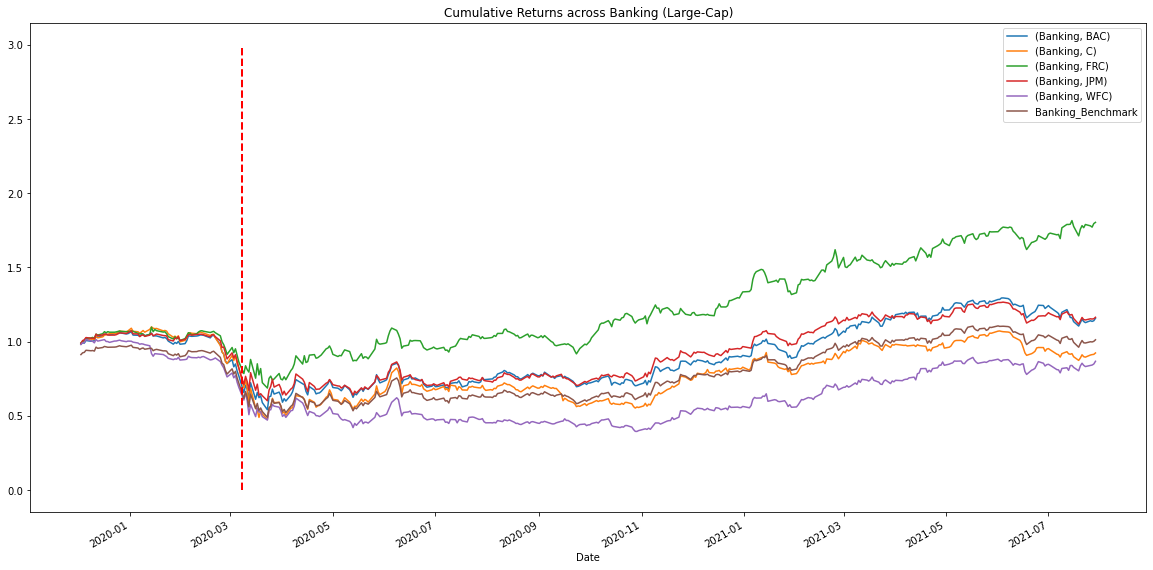

In [19]:
bnf_final.plot(figsize=(20,10),title='Cumulative Returns across Banking (Large-Cap)')
plt.plot([dt.datetime(2020, 3, 8, 0, 0), dt.datetime(2020, 3, 8, 0, 0)], [0, 3], 'r-', lw=2, linestyle='dashed')

### Technology

In [20]:
tech_final = pd.merge(cumulative_returns[["Technology"]], benchmark_tech, left_on="Date", right_on="Date")
tech_final.head()

/Users/mrunalighelani/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,"(Technology, AAPL)","(Technology, FB)","(Technology, GOOGL)","(Technology, MSFT)","(Technology, NVDA)",Technology_Benchmark
Date,,,,,,
2019-12-03,0.982170,0.995593,1.004562,0.998395,0.992401,0.551791
2019-12-04,0.990839,0.995043,1.023338,1.002006,1.000812,0.554585
2019-12-05,1.005375,0.998297,1.029561,1.002541,0.997563,0.555378
2019-12-06,1.024796,1.006760,1.039205,1.014711,1.013955,0.561325
2019-12-09,1.010448,1.008212,1.041998,1.012103,1.013955,0.559010


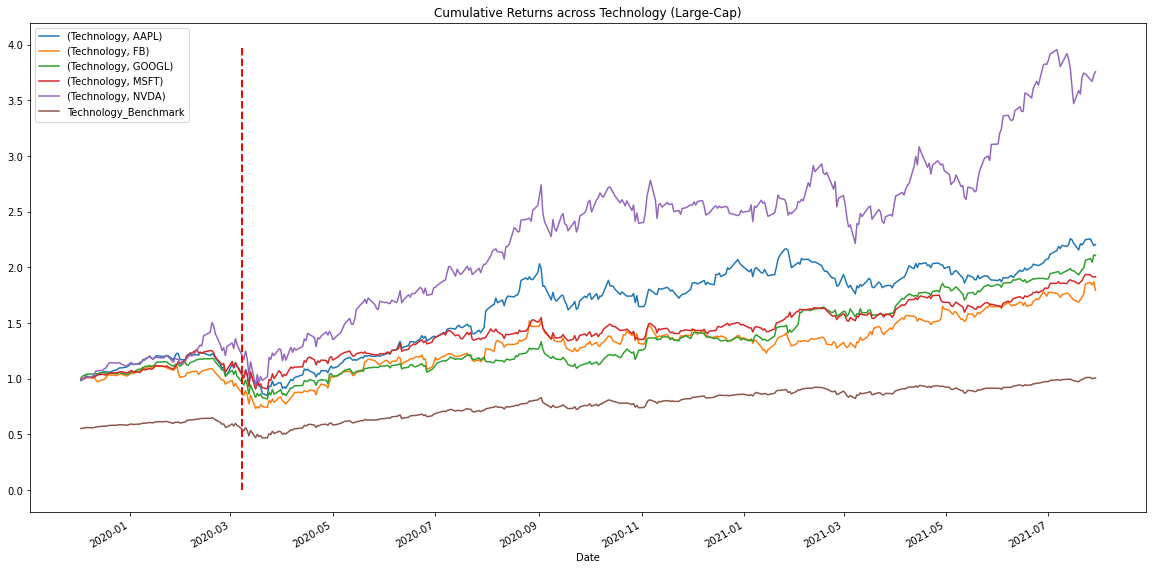

In [21]:
tech_final.plot(figsize=(20,10),title='Cumulative Returns across Technology (Large-Cap)')
plt.plot([dt.datetime(2020, 3, 8, 0, 0), dt.datetime(2020, 3, 8, 0, 0)], [0, 4], 'r-', lw=2, linestyle='dashed')

### Healthcare

In [22]:
hc_final = pd.merge(cumulative_returns[["Healthcare"]], benchmark_hc, left_on="Date", right_on="Date")
hc_final.head()

/Users/mrunalighelani/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,"(Healthcare, AZN)","(Healthcare, JNJ)","(Healthcare, MRNA)","(Healthcare, NVS)","(Healthcare, PFE)",Healthcare_Benchmark
Date,,,,,,
2019-12-03,0.989872,0.998544,1.076923,0.995516,0.993732,0.741755
2019-12-04,0.996279,1.014706,1.076417,1.001422,0.996083,0.748528
2019-12-05,0.984291,1.016016,1.044534,1.002297,0.993210,0.748749
2019-12-06,0.985531,1.021986,0.958502,1.007000,1.000000,0.753363
2019-12-09,0.987391,1.022860,0.950405,1.012031,1.000783,0.748222


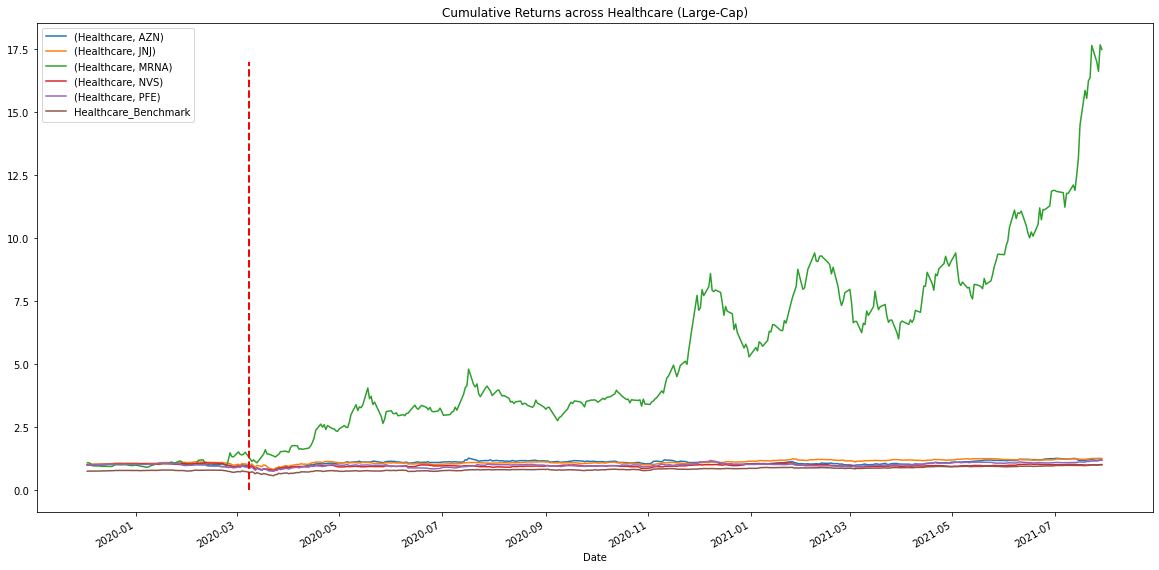

In [23]:
hc_final.plot(figsize=(20,10),title='Cumulative Returns across Healthcare (Large-Cap)')
plt.plot([dt.datetime(2020, 3, 8, 0, 0), dt.datetime(2020, 3, 8, 0, 0)], [0, 17], 'r-', lw=2, linestyle='dashed')

## \<Explore reason later>

## Portfolio Comparison with Benchmark

In [24]:
all_final = pd.merge(cumulative_returns[[("Healthcare", "MRNA"), 
                                        ("Technology", "NVDA"),
                                        ("Banking", "FRC")]], benchmark_all, left_on="Date", right_on="Date")
all_final.head()

/Users/mrunalighelani/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,"(Healthcare, MRNA)","(Technology, NVDA)","(Banking, FRC)",S&P500
Date,,,,
2019-12-03,1.076923,0.992401,0.990915,0.703758
2019-12-04,1.076417,1.000812,1.001726,0.708208
2019-12-05,1.044534,0.997563,1.008177,0.709271
2019-12-06,0.958502,1.013955,1.022349,0.715751
2019-12-09,0.950405,1.013955,1.024621,0.713487


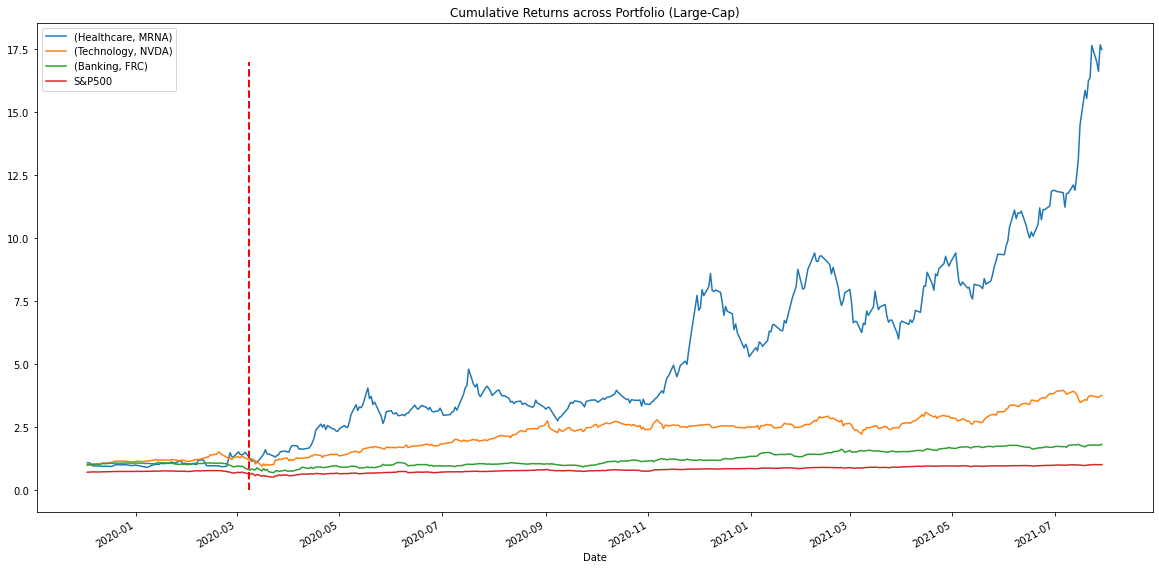

In [25]:
all_final.plot(figsize=(20,10),title='Cumulative Returns across Portfolio (Large-Cap)')
plt.plot([dt.datetime(2020, 3, 8, 0, 0), dt.datetime(2020, 3, 8, 0, 0)], [0, 17], 'r-', lw=2, linestyle='dashed')